In [78]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import nltk
import gensim
from gensim import corpora

In [79]:
#nltk.download()

In [80]:
#-Read all reviews for USS
df1 = pd.read_csv("extract1_0_199.csv")
df2 = pd.read_csv("extract1_200_399.csv")
df3 = pd.read_csv("extract1_400_499.csv")

#-Merge Data Frames
frames = [df1, df2, df3]
reviews = pd.concat(frames)

In [81]:
# Cleaning and pre-processing of review texts

stop = set(stopwords.words('english'))
stop.update(['universal', 'studio', 'singapore', 'day', 'visit', 'place', 'park'])

exclude = set(string.punctuation) 

lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc.decode('utf-8')).split() for doc in reviews.ix[:,2]] 

In [82]:
doc_clean

[[u'enough',
  u'keep',
  u'family',
  u'four',
  u'occupied',
  u'day',
  u'went',
  u'early',
  u'morning',
  u'midweek',
  u'it',
  u'wasnt',
  u'busy',
  u'roller',
  u'coaster',
  u'good',
  u'afults',
  u'older',
  u'child',
  u'plenty',
  u'keep',
  u'younger',
  u'one',
  u'amusedslightly',
  u'confusing',
  u'get',
  u'taken',
  u'cable',
  u'car',
  u'sentosa',
  u'youre',
  u'using',
  u'option',
  u'need',
  u'get',
  u'another',
  u'cable',
  u'car',
  u'monorail',
  u'difficult',
  u'good',
  u'fun'],
 [u'best',
  u'ride',
  u'transformer',
  u'4droller',
  u'coaster',
  u'best',
  u'many',
  u'ride',
  u'better',
  u'take',
  u'fast',
  u'pas',
  u'fully',
  u'enjoy',
  u'ride'],
 [u'visited',
  u'studio',
  u'monday',
  u'hoping',
  u'would',
  u'much',
  u'crowd',
  u'instead',
  u'discovered',
  u'everywhere',
  u'busy',
  u'able',
  u'ride',
  u'3',
  u'ride',
  u'7',
  u'hour',
  u'period',
  u'wait',
  u'average',
  u'hour',
  u'plus',
  u'ride',
  u'ride',
  u'fee

In [83]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

In [84]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [85]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [92]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

In [93]:
len(ldamodel.print_topics())

10

In [94]:
import dill
dill.dump(ldamodel, open('ldamodel.pkd', 'w'))

In [95]:
ldamodel_load = dill.load(open('ldamodel.pkd', 'r'))

print(ldamodel_load.print_topics())

[(0, u'0.010*rain + 0.010*weather + 0.008*food + 0.007*hot + 0.006*kid + 0.006*good + 0.006*old + 0.006*year + 0.006*really + 0.005*staff'), (1, u'0.025*sentosa + 0.013*take + 0.013*mrt + 0.013*city + 0.013*station + 0.012*train + 0.011*us + 0.011*monorail + 0.009*car + 0.009*bus'), (2, u'0.040*ride + 0.018*time + 0.018*express + 0.015*queue + 0.015*pas + 0.012*get + 0.010*ticket + 0.010*line + 0.010*wait + 0.009*go'), (3, u'0.006*tour + 0.006*zone + 0.004*seven + 0.004*guide + 0.004*stuck + 0.003*polite + 0.003*furious + 0.003*dancing + 0.003*southeast + 0.003*if'), (4, u'0.066*ride + 0.025*transformer + 0.020*mummy + 0.018*show + 0.017*coaster + 0.017*roller + 0.013*jurassic + 0.011*4d + 0.011*shrek + 0.010*far'), (5, u'0.030*ride + 0.019*fun + 0.017*studio + 0.016*one + 0.016*great + 0.015*attraction + 0.013*lot + 0.013*kid + 0.013*must + 0.013*time'), (6, u'0.017*water + 0.015*get + 0.013*bring + 0.013*dont + 0.013*take + 0.011*show + 0.010*ride + 0.010*time + 0.009*ticket + 0.008*

In [96]:
list1 = []
list2 = []
topic = ""
full_string = ""

for i in ldamodel.print_topics():
    list1.append(i[1].split("+"))
    
for j in list1:
    for k in j:
        topic = topic + k.split("*")[1]
        full_string = full_string + k.split("*")[1]
    list2.append(topic)
    topic = ""
    
for m in list2:
    print m
    
print full_string
        

rain weather food hot kid good old year really staff
sentosa take mrt city station train us monorail car bus
ride time express queue pas get ticket line wait go
tour zone seven guide stuck polite furious dancing southeast if
ride transformer mummy show coaster roller jurassic 4d shrek far
ride fun studio one great attraction lot kid must time
water get bring dont take show ride time ticket us
night halloween house horror event son hearted air us business
sentosa hotel car package cable excitement site island company 2015
king service learn opp kranji marsiling juliens spin dinosoarin partygoround
rain weather food hot kid good old year really staffsentosa take mrt city station train us monorail car busride time express queue pas get ticket line wait gotour zone seven guide stuck polite furious dancing southeast ifride transformer mummy show coaster roller jurassic 4d shrek farride fun studio one great attraction lot kid must timewater get bring dont take show ride time ticket usnight h

In [42]:
!pip install wordcloud

    100% |████████████████████████████████| 174kB 3.7MB/s ta 0:00:01
  Running setup.py bdist_wheel for wordcloud ... - \ | done
  Stored in directory: /home/vagrant/.cache/pip/wheels/d9/4c/ac/e63c45f2ce09860e9459a410953039c30296e89d9f7234675f
Successfully built wordcloud


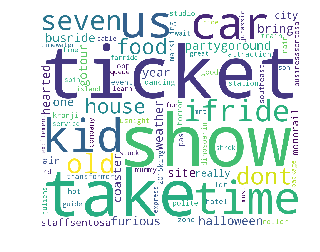

In [97]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Convert all the required text into a single string here 
#and store them in word_string

#you can specify fonts, stopwords, background color and other options

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(full_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [64]:
#####################################################################################
# Topic Modeling for GBB
#####################################################################################

In [98]:
reviews_gbb = dill.load(open('tareviews_gbb.pkd', 'r'))

In [104]:
# Cleaning and pre-processing of review texts

gbb_stop = set(stopwords.words('english'))
gbb_stop.update(['singapore', 'day', 'visit', 'place', 'park', 'garden'])

exclude = set(string.punctuation) 

lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

gbb_doc_clean = [clean(doc.decode('utf-8')).split() for doc in reviews_gbb.ix[:,2]] 

In [105]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
gbb_dictionary = corpora.Dictionary(gbb_doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
gbb_doc_term_matrix = [gbb_dictionary.doc2bow(doc) for doc in gbb_doc_clean]

# Creating the object for LDA model using gensim library
gbb_Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
gbb_ldamodel = gbb_Lda(gbb_doc_term_matrix, num_topics=10, id2word = gbb_dictionary, passes=50)

import dill
dill.dump(gbb_ldamodel, open('gbb_ldamodel.pkd', 'w'))


In [106]:
gbb_ldamodel_load = dill.load(open('gbb_ldamodel.pkd', 'r'))

print(gbb_ldamodel_load.print_topics())

[(0, u'0.058*light + 0.056*show + 0.030*night + 0.027*tree + 0.023*evening + 0.018*go + 0.015*time + 0.015*garden + 0.014*see + 0.014*music'), (1, u'0.055*flower + 0.050*dome + 0.034*plant + 0.032*cloud + 0.030*garden + 0.028*forest + 0.015*tree + 0.013*waterfall + 0.012*world + 0.011*different'), (2, u'0.033*food + 0.024*area + 0.024*water + 0.021*bay + 0.021*kid + 0.018*satay + 0.015*garden + 0.013*play + 0.011*childrens + 0.011*restaurant'), (3, u'0.027*great + 0.025*nice + 0.024*good + 0.023*lot + 0.023*family + 0.017*kid + 0.016*place + 0.016*take + 0.015*it + 0.015*beautiful'), (4, u'0.014*tulip + 0.009*xmas + 0.009*blossom + 0.007*cherry + 0.006*eye + 0.006*organized + 0.006*arrangement + 0.005*display + 0.005*quality + 0.005*hard'), (5, u'0.028*garden + 0.027*dome + 0.015*walk + 0.013*cloud + 0.013*flower + 0.011*around + 0.011*get + 0.011*worth + 0.011*time + 0.010*ticket'), (6, u'0.081*bay + 0.064*marina + 0.060*garden + 0.046*sand + 0.026*hotel + 0.020*view + 0.014*city + 0.

In [107]:
list1 = []
list2 = []
topic = ""
full_string = ""

for i in gbb_ldamodel_load.print_topics():
    list1.append(i[1].split("+"))
    
for j in list1:
    for k in j:
        topic = topic + k.split("*")[1]
        full_string = full_string + k.split("*")[1]
    list2.append(topic)
    topic = ""
    
for m in list2:
    print m
    
print full_string

light show night tree evening go time garden see music
flower dome plant cloud garden forest tree waterfall world different
food area water bay kid satay garden play childrens restaurant
great nice good lot family kid place take it beautiful
tulip xmas blossom cherry eye organized arrangement display quality hard
garden dome walk cloud flower around get worth time ticket
bay marina garden sand hotel view city walk bridge across
garden see must singapore amazing night well beautiful worth time
like it one seen never time go would u thing
christmas year new chinese decoration crowded event theme holiday season
light show night tree evening go time garden see musicflower dome plant cloud garden forest tree waterfall world differentfood area water bay kid satay garden play childrens restaurantgreat nice good lot family kid place take it beautifultulip xmas blossom cherry eye organized arrangement display quality hardgarden dome walk cloud flower around get worth time ticketbay marina garde

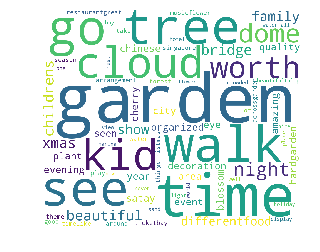

In [108]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Convert all the required text into a single string here 
#and store them in word_string

#you can specify fonts, stopwords, background color and other options

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(full_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()